# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression 
from datetime import datetime
import datetime as dt

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

#save the file
output_data_file = "output_data/cities.csv"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khovd
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | kolonia
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | espargos
City not found. Skipping...
Processing Record 10 of Set 1 | dauphin
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | chibougamau
Processing Record 13 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | mangai
Processing Record 16 of Set 1 | sept-iles
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | tanki leendert
City not found. Skipping...
Processing Record 19 of Set 1 | vilyuchinsk
Processing Record 20 of Set 1 | la

Processing Record 36 of Set 4 | isafjordur
Processing Record 37 of Set 4 | padang
Processing Record 38 of Set 4 | tallahassee
Processing Record 39 of Set 4 | villa yapacani
Processing Record 40 of Set 4 | kodinsk
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | ust-tsilma
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | sovetskaya gavan'
Processing Record 45 of Set 4 | lerwick
Processing Record 46 of Set 4 | marsaskala
City not found. Skipping...
Processing Record 47 of Set 4 | labuan bajo
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | pangody
Processing Record 0 of Set 5 | kilju
Processing Record 1 of Set 5 | aasiaat
Processing Record 2 of Set 5 | popondetta
Processing Record 3 of Set 5 | la cruz
Processing Record 4 of Set 5 | gereida
Processing Record 5 of Set 5 | burela de cabo
Processing Record 6 of Set 5 | choyr
Processing Record 7 of Set 5 | cabo san lucas
Processing Record 8 of Set 5 | nema
Processin

City not found. Skipping...
Processing Record 26 of Set 8 | embrun
Processing Record 27 of Set 8 | ust-nera
Processing Record 28 of Set 8 | yinchuan
Processing Record 29 of Set 8 | zemio
Processing Record 30 of Set 8 | bukoba
Processing Record 31 of Set 8 | waddan
Processing Record 32 of Set 8 | linhares
Processing Record 33 of Set 8 | lys'va
Processing Record 34 of Set 8 | mont-dore
Processing Record 35 of Set 8 | ust'-charyshskaya pristan'
Processing Record 36 of Set 8 | afif
Processing Record 37 of Set 8 | danli
Processing Record 38 of Set 8 | mount pleasant
Processing Record 39 of Set 8 | lazaro cardenas
Processing Record 40 of Set 8 | iquique
Processing Record 41 of Set 8 | san antonio de pale
Processing Record 42 of Set 8 | imbituba
Processing Record 43 of Set 8 | tsiombe
Processing Record 44 of Set 8 | saryozek
Processing Record 45 of Set 8 | machali
Processing Record 46 of Set 8 | tbeng meanchey
Processing Record 47 of Set 8 | cidreira
Processing Record 48 of Set 8 | constituci

Processing Record 16 of Set 12 | merizo village
Processing Record 17 of Set 12 | wa
City not found. Skipping...
Processing Record 18 of Set 12 | kerikeri
Processing Record 19 of Set 12 | kruisfontein
Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | vilyuysk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khovd,48.0056,91.6419,284.26,41,13,2.23,MN,1683682747
1,thompson,55.7435,-97.8558,290.24,59,75,4.63,CA,1683682376
2,yellowknife,62.4560,-114.3525,287.44,47,20,5.66,CA,1683682748
3,edinburgh of the seven seas,-37.0676,-12.3116,286.56,62,91,9.37,SH,1683682553
4,kolonia,50.9333,6.9500,287.07,92,75,2.57,DE,1683682749


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khovd,48.0056,91.6419,284.26,41,13,2.23,MN,1683682747
1,thompson,55.7435,-97.8558,290.24,59,75,4.63,CA,1683682376
2,yellowknife,62.4560,-114.3525,287.44,47,20,5.66,CA,1683682748
3,edinburgh of the seven seas,-37.0676,-12.3116,286.56,62,91,9.37,SH,1683682553
4,kolonia,50.9333,6.9500,287.07,92,75,2.57,DE,1683682749


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

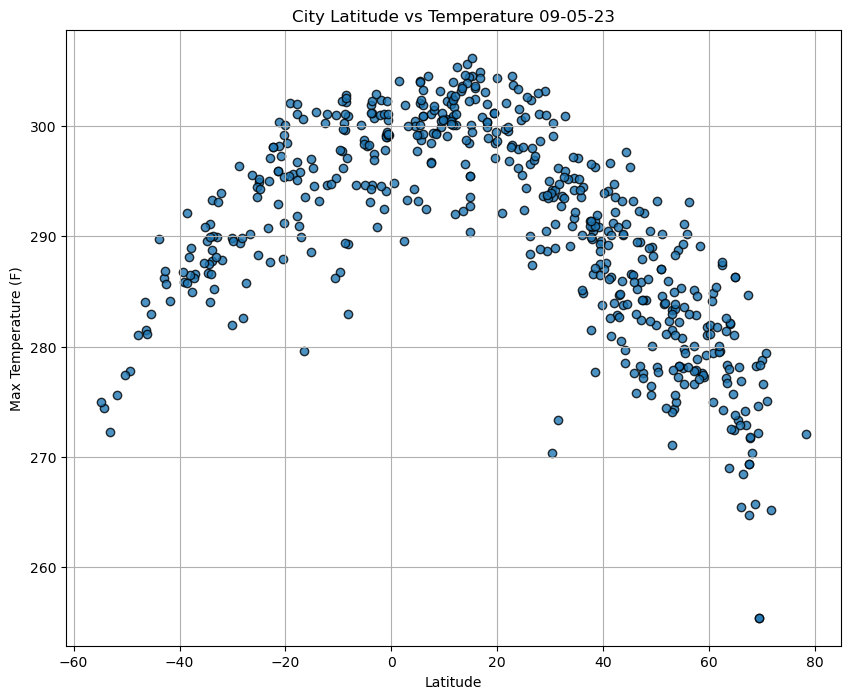

In [13]:
# Build scatter plot for latitude vs. temperature
from datetime import datetime
dateTimeObj = datetime.now()
datestamp = dateTimeObj.strftime("%d-%m-%y")
datestamp 
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Temperature {datestamp}")
plt.grid()

# Save the figure
plt.savefig("output_data/latitude_vs_temperature.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude Vs. Humidity

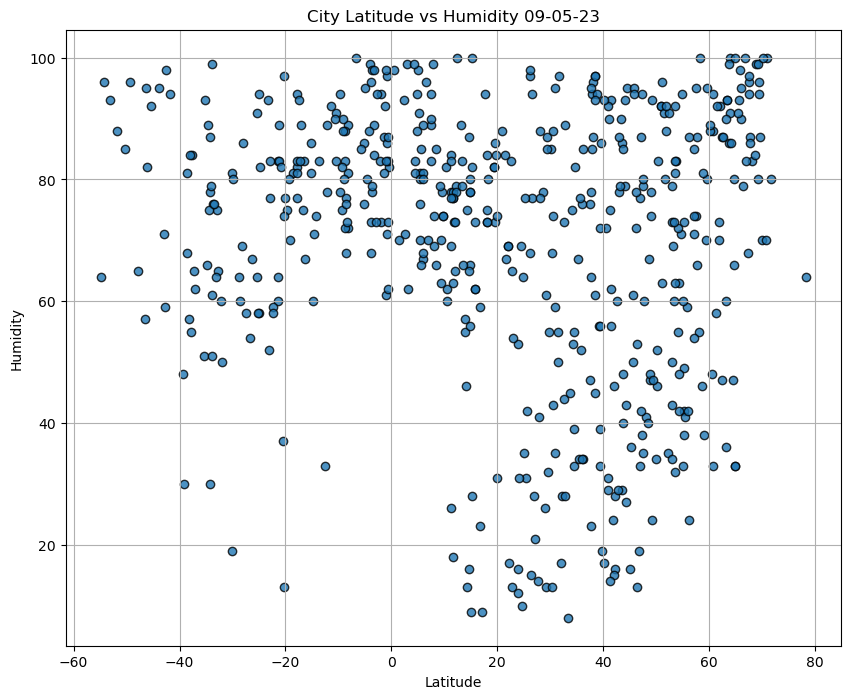

In [12]:
# code for a scatter plot for latitude vs humidity.
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs Humidity {datestamp}')
plt.grid()
plt.savefig("output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

#### Latitude Vs. Cloudiness

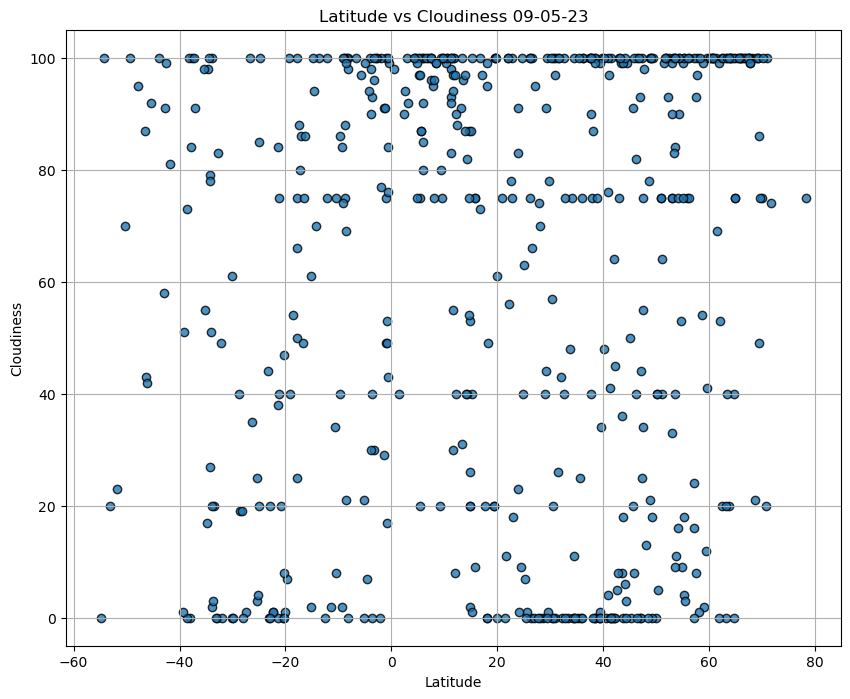

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness {datestamp}')
plt.grid()

# Save the figure
plt.savefig("output_data/latitude_vs_cloudiness.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

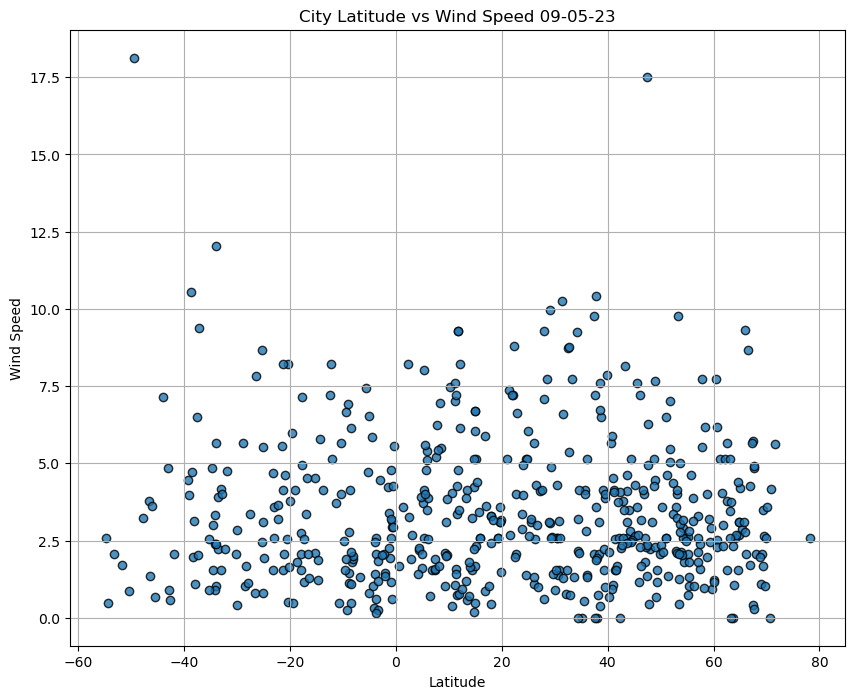

In [16]:
# Build the scatter plots for latitude vs. wind speed
# Create a scatter plot for latitude vs wind speed.
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed {datestamp}')
plt.grid()

# Save the figure
plt.savefig("output_data/latitude_vs_wind_speed.png", bbox_inches="tight")

#Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khovd,48.0056,91.6419,284.26,41,13,2.23,MN,1683682747
1,thompson,55.7435,-97.8558,290.24,59,75,4.63,CA,1683682376
2,yellowknife,62.4560,-114.3525,287.44,47,20,5.66,CA,1683682748
4,kolonia,50.9333,6.9500,287.07,92,75,2.57,DE,1683682749
7,iqaluit,63.7506,-68.5145,269.00,86,20,0.00,CA,1683682560


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,286.56,62,91,9.37,SH,1683682553
5,waitangi,-43.9535,-176.5597,289.72,95,100,7.15,NZ,1683682557
6,port elizabeth,-33.9180,25.5701,287.77,99,2,1.03,ZA,1683682597
9,punta arenas,-53.1500,-70.9167,272.21,93,20,2.06,CL,1683682652
11,adamstown,-25.0660,-130.1015,294.90,58,85,5.53,PN,1683682536


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7342500802846308
The correlation between both factors is -0.86


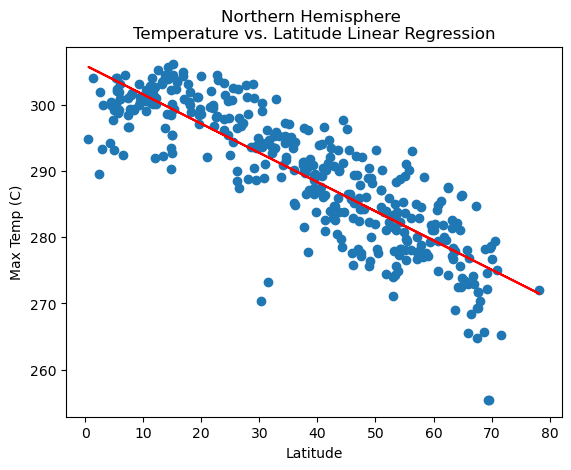

In [21]:
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Max Temp"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 10,240
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    plt.title("Northern Hemisphere \nTemperature vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig("output_data/north_temp_vs_lat.png", bbox_inches="tight")
    plt.show()
    
plotlinearregression(x_values, y_values, "Max Temp")

The r-value is: 0.612696182601104
The correlation between both factors is 0.78


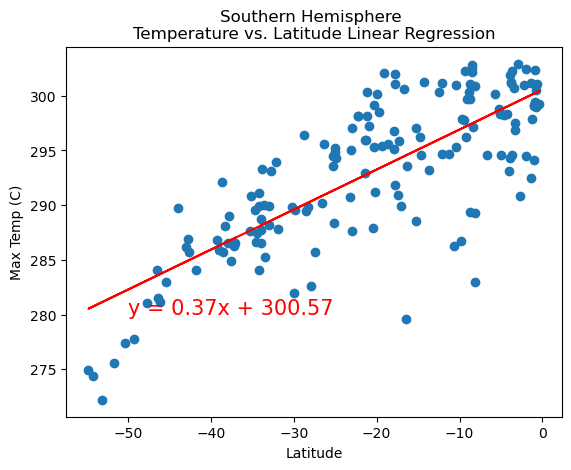

<Figure size 640x480 with 0 Axes>

In [22]:
# Linear regression on Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Max Temp"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,280
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    plt.title("Southern Hemisphere \nTemperature vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
   
    #plt.figure(figsize=(4,4))
    plt.show()
    plt.savefig("output_data/south_temp_vs_lat.png")#, bbox_inches="tight")
    
    
plotlinearregression(x_values, y_values, "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0022805328527909633
The correlation between both factors is 0.05


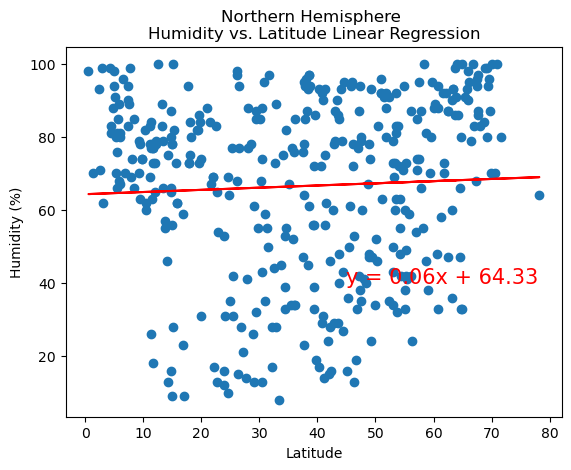

<Figure size 640x480 with 0 Axes>

In [24]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere - Humidity Vs Latitiude

x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Humidity"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 45,40
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Northern Hemisphere \nHumidity vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Humidity")
plt.savefig("output_data/North_Humidity_vs_lat.png", bbox_inches="tight")
plt.show()

The r-value is: 0.04879210715046987
The correlation between both factors is 0.22


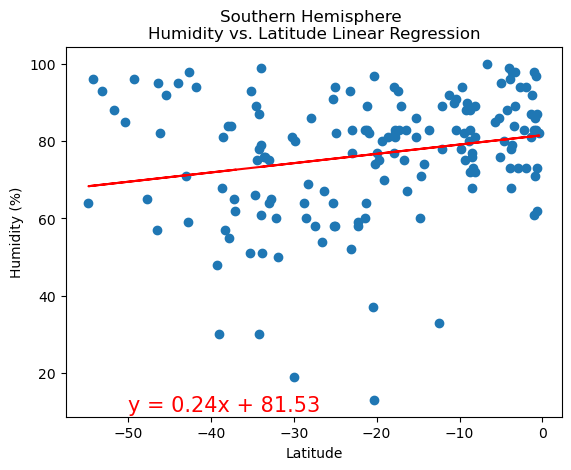

<Figure size 640x480 with 0 Axes>

In [26]:
# Southern Hemisphere
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Humidity"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,10
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Southern Hemisphere \nHumidity vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()

plotlinearregression(x_values, y_values, "Humidity")
plt.savefig("output_data/south_humidity_vs_lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0008842003764518516
The correlation between both factors is -0.03


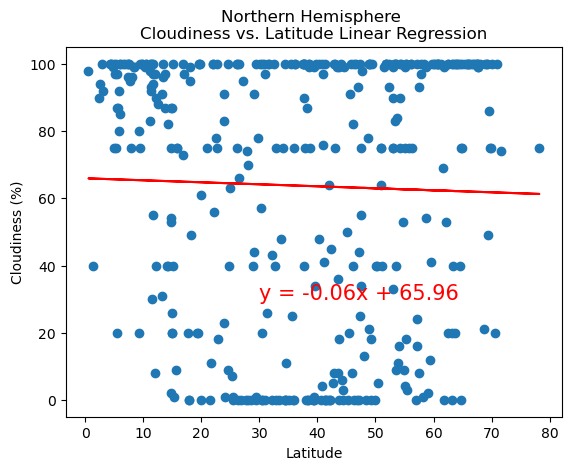

<Figure size 640x480 with 0 Axes>

In [27]:
# Northern Hemisphere
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Cloudiness"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 30,30
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.title("Northern Hemisphere \nCloudiness vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Cloudiness")
plt.savefig("output_data/Northern Cloudiness_vs_lat.png", bbox_inches="tight")
plt.show()

The r-value is: 0.017097932905653236
The correlation between both factors is 0.13


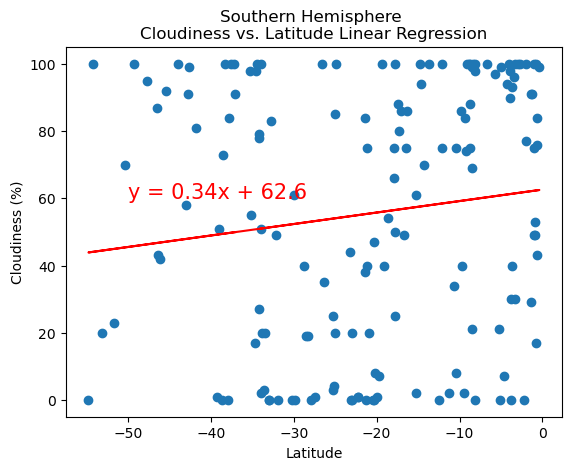

<Figure size 640x480 with 0 Axes>

In [28]:
# Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Cloudiness"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,60
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.title("Southern Hemisphere \nCloudiness vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Cloudiness")
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_vs_Lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005333855200878373
The correlation between both factors is -0.07


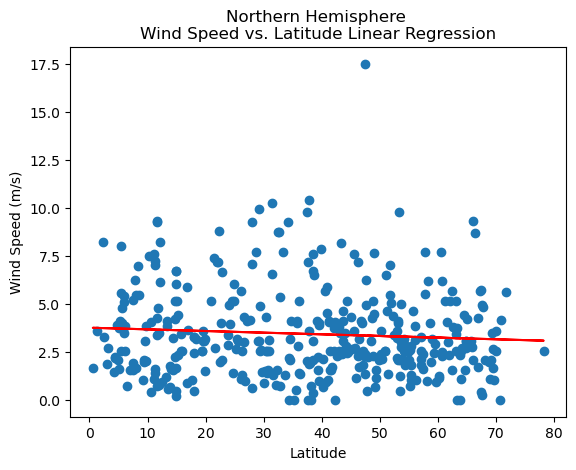

<Figure size 640x480 with 0 Axes>

In [29]:
# Northern Hemisphere
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Wind Speed"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 20,20
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Northern Hemisphere \nWind Speed vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Wind Speed")
plt.savefig("output_data/Northern_Hemisphere_Wind_Speed_vs_lat.png", bbox_inches="tight")
plt.show()

The r-value is: 0.015488287400786054
The correlation between both factors is -0.12


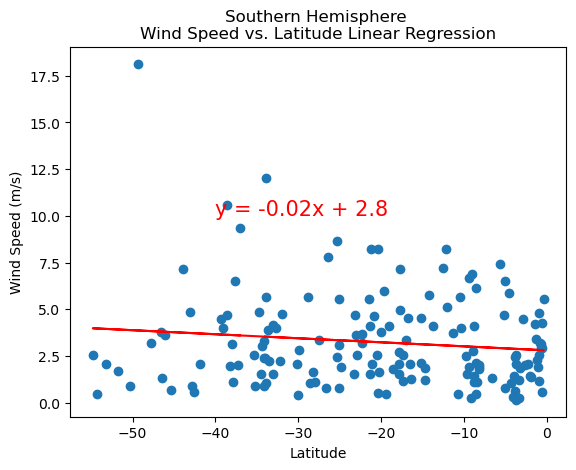

<Figure size 640x480 with 0 Axes>

In [30]:
# Southern Hemisphere
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Wind Speed"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -40,10
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Southern Hemisphere \nWind Speed vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Wind Speed")
plt.savefig("output_data/Southern_Hemisphere_Wind_Speed_vs_lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE